<a href="https://colab.research.google.com/github/PoorneshShiva/Deep-learning-assigments/blob/main/08_Animal_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Animal Classification

In [ ]:
# TODO: Download datasets
!wget https://storage.googleapis.com/adsa-data/animal-classification/animal.zip
!unzip animal.zip -d temp

--2024-12-01 19:55:38--  https://storage.googleapis.com/adsa-data/animal-classification/animal.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 142.251.175.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570445498 (544M) [application/zip]
Saving to: ‘animal.zip’

animal.zip           64%[===========>        ] 351.75M  11.8MB/s    eta 18s    

In [ ]:
!mkdir -p data/dog
!mkdir -p data/cat
!cp temp/train/dog.* data/dog/
!cp temp/train/cat.* data/cat/

In [ ]:
import os

dog_count = len(os.listdir("./data/dog"))
cat_count = len(os.listdir("./data/cat"))
print("Dog pictures: ", dog_count)
print("Cat pictures: ", cat_count)

## Data Preparation

In [ ]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=32

In [ ]:
# TODO: Split and load datasets
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# TODO Use tf.keras.utils.image_dataset_from_directory to assign 80% images to the train dataset
(train_ds, val_ds) = tf.keras.utils.image_dataset_from_directory(
    "./data",
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
# TODO: Plot some images along with their labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# TODO: Set cache for datasets
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Preparation

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential()

# TODO: Load EfficientNetB7 model with pretrained weights
# but without the fully-connected layer at the top.
# We want to add our own FC layers and outputs
base = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
)
model.add(base)

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.trainable = True

base.trainable = False

for layer in model.layers:
    print(layer.name, ' ', layer.trainable)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

## Training

In [ ]:
# TODO: Train model for 1 epoch
model.fit(x=train_ds,validation_data=val_ds,epochs=1)

## Testing

In [ ]:
# TODO: Load test set
!wget https://storage.googleapis.com/adsa-data/animal-classification/test.zip
!unzip test.zip


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1AD_I129zEshKO_LgLkDjOyLUbc51L6GB
To: /content/animal-test.zip
100% 65.4k/65.4k [00:00<00:00, 62.8MB/s]
Archive:  animal-test.zip
  inflating: test/cat1.jpg           
  inflating: test/cat2.jpg           
  inflating: test/cat3.jpg           
  inflating: test/dog1.jpg           
  inflating: test/dog2.jpg           
  inflating: test/dog3.jpg           
  inflating: test/dog4.jpg           


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "./test",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

dog: 98.87%


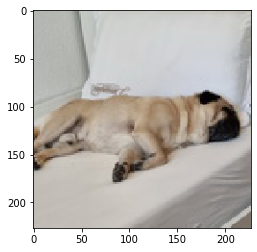

In [ ]:
# TODO: Retry again with downloaded images
model.predict(test_ds[0])

#### Test any image


In [ ]:
import numpy as np

image_path = 'test/dog1.jpg'

image = tf.keras.utils.load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))

image_array = tf.keras.utils.img_to_array(image)

# Normalize the pixel values to [0, 1]
image_array = image_array / 255.0

# Add batch dimension
image_array = np.expand_dims(image_array, axis=0)  # Shape becomes (1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)


In [ ]:
from tensorflow.keras.preprocessing import image
img_path = 'test/cat1.jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)


In [ ]:
predicted_image = model.predict(img_array)

In [ ]:
model.predict(img_array)
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"dog: ")
plt.show()